In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/Colab\ Notebooks/


'Copy of Welcome to Colab'


In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/small_dataset.txt'

In [4]:
!unzip /content/drive/MyDrive/archive_3.zip -d /content/


Archive:  /content/drive/MyDrive/archive_3.zip
  inflating: /content/BooksDataset.csv  
  inflating: /content/BooksDatasetClean.csv  


In [5]:
import pandas as pd
file_path = '/content/BooksDatasetClean.csv'
dataset = pd.read_csv(file_path)
dataset.head()


,Title,Authors,Description,Category,Publisher,Price Starting With ($),Publish Date (Month),Publish Date (Year)
0,Goat Brothers,"By Colton, Larry",NaN,"History , General",Doubleday,8.79,January,1993
1,The Missing Person,"By Grumbach, Doris",NaN,"Fiction , General",Putnam Pub Group,4.99,March,1981
2,Don't Eat Your Heart Out Cookbook,"By Piscatella, Joseph C.",NaN,"Cooking , Reference",Workman Pub Co,4.99,September,1983
3,When Your Corporate Umbrella Begins to Leak: A...,"By Davis, Paul D.",NaN,NaN,Natl Pr Books,4.99,April,1991
4,Amy Spangler's Breastfeeding : A Parent's Guide,"By Spangler, Amy",NaN,NaN,Amy Spangler,5.32,February,1997


In [6]:
dataset.columns

Index(['Title', 'Authors', 'Description', 'Category', 'Publisher',
       'Price Starting With ($)', 'Publish Date (Month)',
       'Publish Date (Year)'],
      dtype='object')

In [7]:
dataset.describe()

,Price Starting With ($),Publish Date (Year)
count,103063.000000,103063.000000
mean,6.777172,1994.522865
std,8.932151,13.193129
min,4.890000,1755.000000
25%,4.990000,1989.000000
50%,5.290000,1997.000000
75%,5.700000,2003.000000
max,1095.000000,2023.000000


In [8]:
dataset.isnull().sum()

,0
Title,0
Authors,0
Description,32859
Category,26161
Publisher,8
Price Starting With ($),0
Publish Date (Month),0
Publish Date (Year),0


In [9]:
dataset['Description'] = dataset['Description'].fillna('No description')
dataset['Category'] = dataset['Category'].fillna('Unknown')
dataset['Publisher'] = dataset['Publisher'].fillna('Unknown')

dataset['Price Starting With ($)'] = dataset['Price Starting With ($)'].fillna(dataset['Price Starting With ($)'].median())
dataset['Publish Date (Year)'] = dataset['Publish Date (Year)'].fillna(dataset['Publish Date (Year)'].median())
dataset['Publish Date (Month)'] = dataset['Publish Date (Month)'].fillna('Unknown')


In [10]:
print(dataset.isna().sum())


Title                      0
Authors                    0
Description                0
Category                   0
Publisher                  0
Price Starting With ($)    0
Publish Date (Month)       0
Publish Date (Year)        0
dtype: int64


In [11]:
print(dataset.head())

print(dataset.describe())
print(dataset.info())


                                               Title  \
0                                      Goat Brothers   
1                                 The Missing Person   
2                  Don't Eat Your Heart Out Cookbook   
3  When Your Corporate Umbrella Begins to Leak: A...   
4    Amy Spangler's Breastfeeding : A Parent's Guide   

                    Authors     Description              Category  \
0          By Colton, Larry  No description     History , General   
1        By Grumbach, Doris  No description     Fiction , General   
2  By Piscatella, Joseph C.  No description   Cooking , Reference   
3         By Davis, Paul D.  No description               Unknown   
4          By Spangler, Amy  No description               Unknown   

          Publisher  Price Starting With ($) Publish Date (Month)  \
0         Doubleday                     8.79              January   
1  Putnam Pub Group                     4.99                March   
2    Workman Pub Co                     4

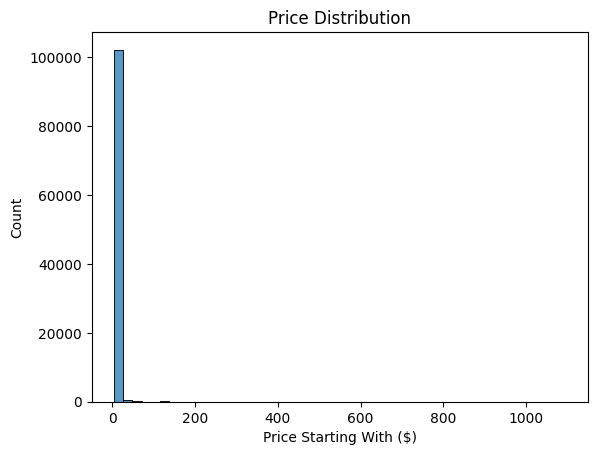

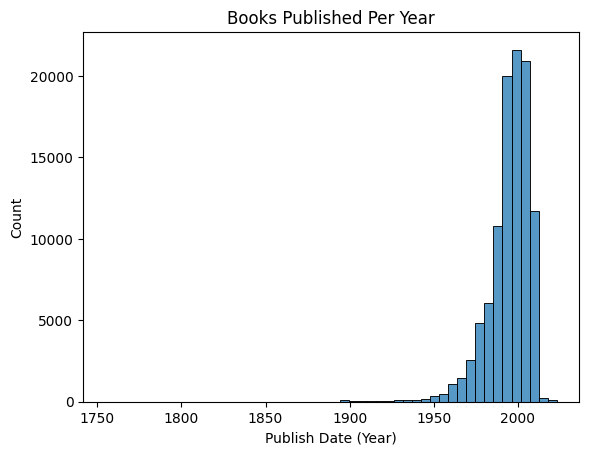

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(dataset['Price Starting With ($)'], bins=50)
plt.title('Price Distribution')
plt.show()

sns.histplot(dataset['Publish Date (Year)'], bins=50)
plt.title('Books Published Per Year')
plt.show()


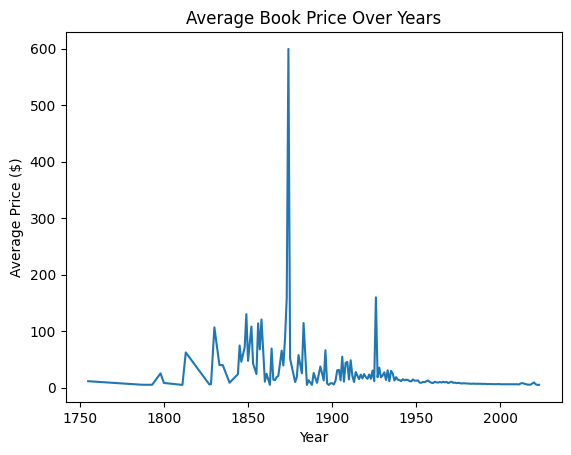

In [13]:
# Average price per year
avg_price_year = dataset.groupby('Publish Date (Year)')['Price Starting With ($)'].mean()
avg_price_year.plot()
plt.title('Average Book Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.show()


In [14]:
dataset.describe()

,Price Starting With ($),Publish Date (Year)
count,103063.000000,103063.000000
mean,6.777172,1994.522865
std,8.932151,13.193129
min,4.890000,1755.000000
25%,4.990000,1989.000000
50%,5.290000,1997.000000
75%,5.700000,2003.000000
max,1095.000000,2023.000000


In [15]:
text_data = dataset['Title'] + ' ' + dataset['Category']

In [16]:
dataset.head()

,Title,Authors,Description,Category,Publisher,Price Starting With ($),Publish Date (Month),Publish Date (Year)
0,Goat Brothers,"By Colton, Larry",No description,"History , General",Doubleday,8.79,January,1993
1,The Missing Person,"By Grumbach, Doris",No description,"Fiction , General",Putnam Pub Group,4.99,March,1981
2,Don't Eat Your Heart Out Cookbook,"By Piscatella, Joseph C.",No description,"Cooking , Reference",Workman Pub Co,4.99,September,1983
3,When Your Corporate Umbrella Begins to Leak: A...,"By Davis, Paul D.",No description,Unknown,Natl Pr Books,4.99,April,1991
4,Amy Spangler's Breastfeeding : A Parent's Guide,"By Spangler, Amy",No description,Unknown,Amy Spangler,5.32,February,1997


In [17]:
import re

text = (dataset['Title'] + ' ' + dataset['Category']).astype(str)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

cleaned_text = text.apply(clean_text)


In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_text)

total_words = len(tokenizer.word_index) + 1


In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

input_sequences = []

for line in cleaned_text:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        input_sequences.append(token_list[:i+1])

max_seq_len = max(len(seq) for seq in input_sequences)

input_sequences = pad_sequences(
    input_sequences,
    maxlen=max_seq_len,
    padding='pre'
)

X = input_sequences[:, :-1]
y = input_sequences[:, -1]


In [20]:
import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Use a smaller dataset for faster training (e.g., 20k rows)
small_dataset = dataset.sample(20000, random_state=42)

# 2. Clean text
text = (small_dataset['Title'] + ' ' + small_dataset['Category']).astype(str)
text = text.str.lower()
text = text.str.replace(r'[^a-z\s]', '', regex=True)
text = text.str.replace(r'\s+', ' ', regex=True)
# 3. Tokenize
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(text)
total_words = len(tokenizer.word_index) + 1

# 4. Build sequences
sequences = tokenizer.texts_to_sequences(text)

max_len = 20
X, y = [], []

for seq in sequences:
    for i in range(1, len(seq)):
        X.append(seq[max(0, i - max_len):i])
        y.append(seq[i])

X = pad_sequences(X, maxlen=max_len)
y = np.array(y)

# 5. Build smaller LSTM model
model = Sequential([
    Embedding(total_words, 50, input_length=max_len),
    LSTM(64),
    Dense(total_words, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 6. Train with fewer epochs and larger batch
model.fit(X, y, epochs=5, batch_size=256)



Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


672/672 ━━━━━━━━━━━━━━━━━━━━ 154s 225ms/step - accuracy: 0.0369 - loss: 7.4873
Epoch 2/5
672/672 ━━━━━━━━━━━━━━━━━━━━ 146s 217ms/step - accuracy: 0.0682 - loss: 6.5743
Epoch 3/5
672/672 ━━━━━━━━━━━━━━━━━━━━ 143s 213ms/step - accuracy: 0.1005 - loss: 6.3109
Epoch 4/5
672/672 ━━━━━━━━━━━━━━━━━━━━ 202s 212ms/step - accuracy: 0.1294 - loss: 6.0403
Epoch 5/5
672/672 ━━━━━━━━━━━━━━━━━━━━ 142s 212ms/step - accuracy: 0.1537 - loss: 5.8366


In [21]:
def predict_next_word(seed_text, next_words=1):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list[-max_len:]], maxlen=max_len)
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted, axis=1)[0]
        output_word = tokenizer.index_word.get(predicted_word_index, '')
        seed_text += ' ' + output_word
    return seed_text
print(predict_next_word("deep learning", next_words=5))


deep learning of the novel fiction romance


In [22]:
print(predict_next_word("deep learning", next_words=5))


deep learning of the novel fiction romance


In [23]:
seed_text = "deep learning fiction romance general growth general"
predicted_text = predict_next_word(seed_text, next_words=5)
print(predicted_text)


deep learning fiction romance general growth general growth general growth general growth


In [24]:
import re
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

text = (
    dataset['Title'].fillna('') + ' ' +
    dataset['Category'].fillna('') + ' ' +
    dataset['Description'].fillna('')
)

text = text.str.lower()
text = text.str.replace(r'[^a-z\s]', '', regex=True)
text = text.str.replace(r'\s+', ' ', regex=True)


In [ ]:
tokenizer = Tokenizer(num_words=15000)
tokenizer.fit_on_texts(text)

total_words = len(tokenizer.word_index) + 1


In [25]:
sequences = tokenizer.texts_to_sequences(text)

max_len = 30
X, y = [], []

for seq in sequences:
    for i in range(1, len(seq)):
        X.append(seq[max(0, i - max_len):i])
        y.append(seq[i])

X = pad_sequences(X, maxlen=max_len)
y = np.array(y)


In [27]:
dataset_small = dataset.sample(15000, random_state=42)


In [30]:
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

text = (
    dataset_small['Title'].fillna('') + ' ' +
    dataset_small['Category'].fillna('')
)

text = text.str.lower()
text = text.str.replace(r'[^a-z\s]', '', regex=True)
text = text.str.replace(r'\s+', ' ', regex=True)


In [31]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(text)

total_words = len(tokenizer.word_index) + 1


In [32]:
sequences = tokenizer.texts_to_sequences(text)

max_len = 20
X, y = [], []

for seq in sequences:
    for i in range(1, len(seq)):
        X.append(seq[max(0, i-max_len):i])
        y.append(seq[i])

X = pad_sequences(X, maxlen=max_len)
y = np.array(y)


In [33]:
model = Sequential([
    Embedding(total_words, 50),
    LSTM(64),
    Dense(total_words, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [34]:
model.fit(
    X, y,
    epochs=5,
    batch_size=256
)


Epoch 1/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 105s 201ms/step - accuracy: 0.0367 - loss: 7.6074
Epoch 2/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 99s 195ms/step - accuracy: 0.0616 - loss: 6.6396
Epoch 3/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 144s 198ms/step - accuracy: 0.0838 - loss: 6.4560
Epoch 4/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 143s 201ms/step - accuracy: 0.1112 - loss: 6.2263
Epoch 5/5
508/508 ━━━━━━━━━━━━━━━━━━━━ 136s 190ms/step - accuracy: 0.1334 - loss: 6.0315


In [35]:
def predict_next_word(seed_text, next_words=5):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list[-max_len:]], maxlen=max_len)
        predicted = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted)
        seed_text += ' ' + tokenizer.index_word.get(predicted_index, '')
    return seed_text

print(predict_next_word("deep learning fiction romance", 5))


deep learning fiction romance general beginner general growth general


In [37]:
model.save("text_model.h5")

In [38]:
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
